In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.base import BaseEstimator, RegressorMixin
import time

# 定义神经网络模型
# class SimpleNN(nn.Module):
#     def __init__(self, input_dim):
#         super(SimpleNN, self).__init__()
#         self.layer1 = nn.Linear(input_dim, 64)
#         self.layer2 = nn.Linear(64, 32)
#         self.output = nn.Linear(32, 1)
    
#     def forward(self, x):
#         x = torch.relu(self.layer1(x))
#         x = torch.relu(self.layer2(x))
#         x = self.output(x)
#         return x
# class SimpleNN(nn.Module):
#     def __init__(self, input_dim):
#         super(SimpleNN, self).__init__()
#         self.layer1 = nn.Linear(input_dim, 128)
#         self.bn1 = nn.BatchNorm1d(128)
#         self.layer2 = nn.Linear(128, 64)
#         self.bn2 = nn.BatchNorm1d(64)
#         self.layer3 = nn.Linear(64, 32)
#         self.bn3 = nn.BatchNorm1d(32)
#         self.output = nn.Linear(32, 1)
    
#     def forward(self, x):
#         x = F.relu(self.bn1(self.layer1(x)))
#         x = F.relu(self.bn2(self.layer2(x)))
#         x = F.relu(self.bn3(self.layer3(x)))
#         x = self.output(x)
#         return x



In [2]:
# 设置数据目录
# for i in range(5):  # 文件夹名为 'cluster_0' 到 'cluster_4'
#     folder_name = f'cluster_{i}'
#     folder_path = os.path.join('data_day_4', folder_name)
clusteri=4
data_dir = f'cluster_{clusteri}'
files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.csv')]

In [3]:
# # 定义神经网络模型
# class SimpleNN(nn.Module):
#     def __init__(self, input_dim, hidden_dims):
#         super(SimpleNN, self).__init__()
#         self.layers = nn.ModuleList()
#         self.bns = nn.ModuleList()
        
#         # 输入层
#         self.layers.append(nn.Linear(input_dim, hidden_dims[0]))
#         self.bns.append(nn.BatchNorm1d(hidden_dims[0]))
        
#         # 隐藏层
#         for i in range(len(hidden_dims) - 1):
#             self.layers.append(nn.Linear(hidden_dims[i], hidden_dims[i + 1]))
#             self.bns.append(nn.BatchNorm1d(hidden_dims[i + 1]))
        
#         # 输出层
#         self.output = nn.Linear(hidden_dims[-1], 1)
    
#     def forward(self, x):
#         for i in range(len(self.layers)):
#             x = F.relu(self.bns[i](self.layers[i](x)))
#         x = self.output(x)
#         return x

In [4]:
# # 包装器类
# class PyTorchRegressor(BaseEstimator, RegressorMixin):
#     def __init__(self, input_dim=10, hidden_dims=[256, 128, 64, 32], lr=0.001, num_epochs=50, batch_size=32):
#         self.input_dim = input_dim
#         self.hidden_dims = hidden_dims
#         self.lr = lr
#         self.num_epochs = num_epochs
#         self.batch_size = batch_size
#         self.model = SimpleNN(input_dim, hidden_dims)
#         self.criterion = nn.MSELoss()
#         self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
    
#     def fit(self, X, y):
#         X_tensor = torch.tensor(X, dtype=torch.float32)
#         y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)
    
#         for epoch in range(self.num_epochs):
#             self.model.train()
#             permutation = torch.randperm(X_tensor.size()[0])
        
#             for i in range(0, X_tensor.size()[0], self.batch_size):
#                 indices = permutation[i:i+self.batch_size]
#                 batch_X, batch_y = X_tensor[indices], y_tensor[indices]
            
#                 self.optimizer.zero_grad()
#                 outputs = self.model(batch_X)
#                 loss = self.criterion(outputs, batch_y)
#                 loss.backward()
#                 self.optimizer.step()
    
#         return self

    
#     def predict(self, X):
#         X_tensor = torch.tensor(X, dtype=torch.float32)
#         self.model.eval()
#         with torch.no_grad():
#             y_pred_tensor = self.model(X_tensor)
#         return y_pred_tensor.numpy()
    
#     def score(self, X, y):
#         y_pred = self.predict(X)
#         return r2_score(y, y_pred)


In [5]:
# 初始化模型
input_dim =   10# 特征数量
model = SimpleNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# # 设置数据目录
# data_dir = 'data_day_4/'
# files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.csv')]

# 初始化结果记录
results = []
import time
time1 = time.time()

In [6]:
# # 遍历每个流域的数据文件
# for file in files:
#     # 读取数据
#     data = pd.read_csv(file)
    
#     # 填补缺失值
#     data.fillna(method='ffill', inplace=True)
    
#     # 特征和目标
#     features = ['Dayl', 'Prcp', 'Srad', 'Tmax',
#                 'Prcp_lag_1', 'Discharge_lag_1', 'Prcp_lag_2', 'Discharge_lag_2',
#                 'Discharge_lag_3', 'Discharge_lag_4']
#     target = 'Discharge'
    
#     # 分割训练集和测试集
#     train_data = data.iloc[:1463]  # 前1463天的数据作为训练集
#     test_data = data.iloc[1463:]  # 其余的数据作为测试集
    
#     # 确保训练集和测试集不为空
#     if train_data.empty or test_data.empty:
#         print(f"Warning: {file} 的训练集或测试集为空，跳过该流域。")
#         continue
    
#     # 分离特征和目标
#     X_train = train_data[features]
#     y_train = train_data[target]
#     X_test = test_data[features]
#     y_test = test_data[target]
    
#     # 标准化
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     # 定义超参数搜索范围
#     param_grid = {
#         'hidden_dims': [[256, 128, 64, 32], [128, 64, 32], [256, 128, 64]],
#         'lr': [0.01, 0.001, 0.0001],
#         'num_epochs': [50, 100],
#         'batch_size': [16, 32, 64]
#     }
    
#     # 使用Grid Search进行超参数调优
#     model = PyTorchRegressor(input_dim=len(features))
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2')
#     grid_search.fit(X_train_scaled, y_train)
    
#     best_model = grid_search.best_estimator_
    
#     # 评估模型
#     y_pred = best_model.predict(X_test_scaled)
    
#     # 计算MSE和R²
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f'{file} - Best Params: {grid_search.best_params_} - Mean Squared Error: {mse}, R²: {r2}')
    
#     # 保存结果
#     results.append({'流域': file, 'Best Params': grid_search.best_params_, 'MSE': mse, 'R²': r2})
    
#     # 绘制预测结果与真实结果的对比
#     plt.figure(figsize=(10, 5))
#     plt.plot(y_test.values, label='Actual')
#     plt.plot(y_pred, label='Predicted')
#     plt.title(f'{file} - 流域预测对比')
#     plt.legend()
#     plt.savefig(f'{file}_prediction_comparison.png')  # 保存图片
#     plt.show()

cluster_4\01516500.csv - Mean Squared Error: 948.3252390018678, R²: 0.5584515676649922


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

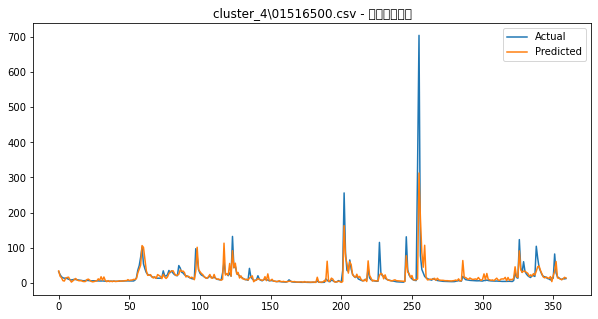

cluster_4\01547700.csv - Mean Squared Error: 26673.101223369238, R²: 0.6454812698616028


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

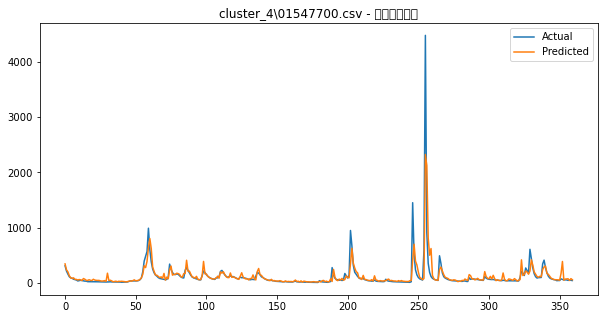

cluster_4\01567500.csv - Mean Squared Error: 2553.2445724440595, R²: 0.38788028121889895


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

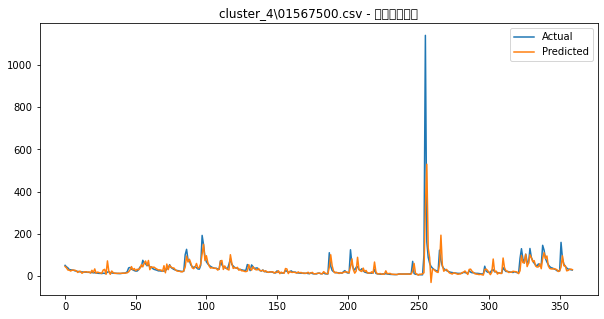

cluster_4\01586610.csv - Mean Squared Error: 1533.1039609581555, R²: 0.4917150411648037


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

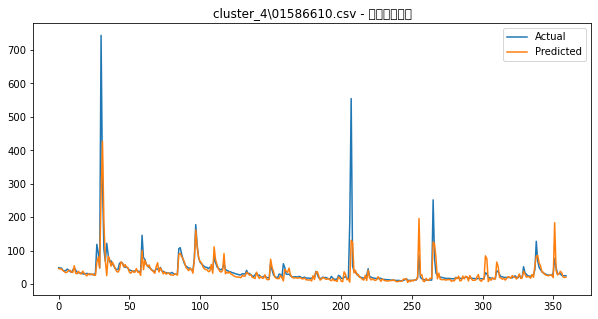

cluster_4\01591400.csv - Mean Squared Error: 481.9949607785374, R²: 0.6581342178112471


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

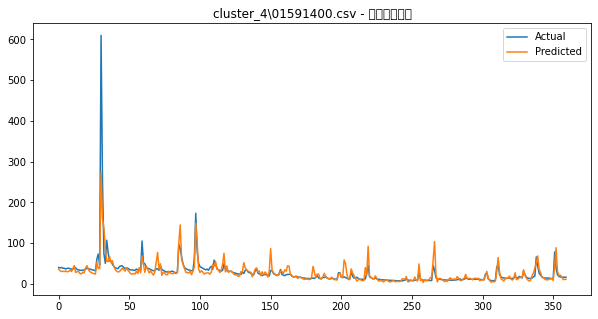

cluster_4\01613050.csv - Mean Squared Error: 1143.3909754664915, R²: 0.5716740028554559


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

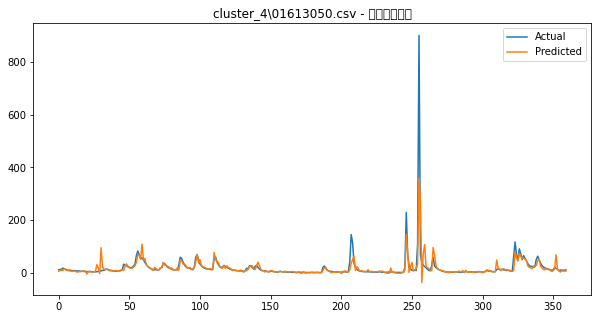

cluster_4\01632900.csv - Mean Squared Error: 5414.940968567004, R²: 0.5193600449420464


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

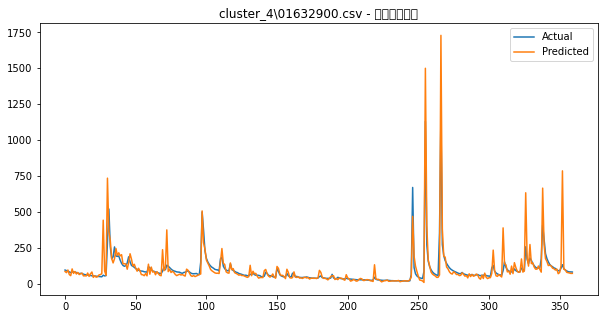

cluster_4\01638480.csv - Mean Squared Error: 34763.97255731443, R²: 0.39822217027014484


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

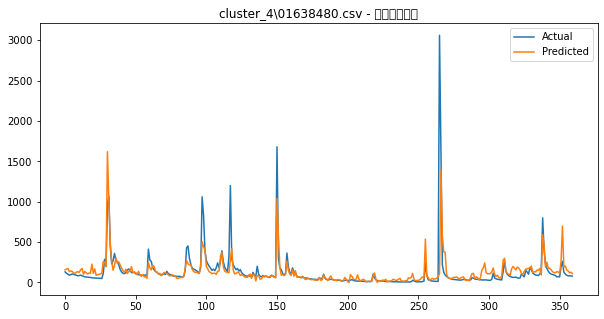

cluster_4\01658500.csv - Mean Squared Error: 143.1697494398459, R²: 0.40412201457195474


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

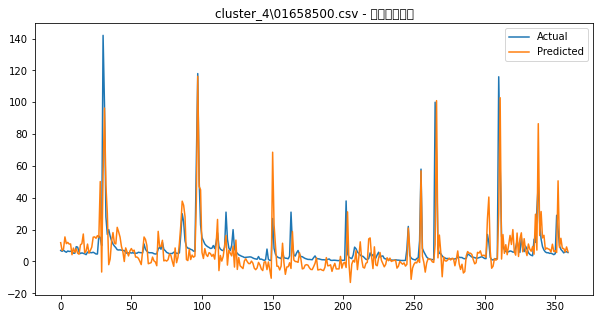

cluster_4\01666500.csv - Mean Squared Error: 58238.2080975519, R²: 0.5339273291831859


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

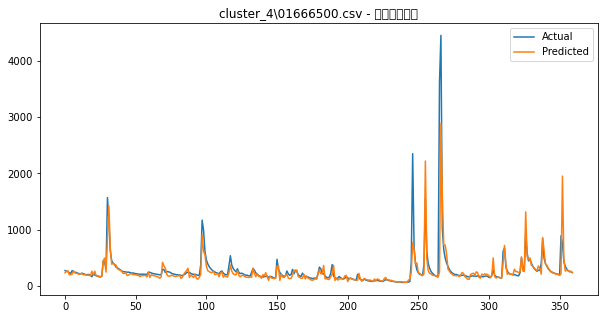

cluster_4\02038850.csv - Mean Squared Error: 110.5120318006913, R²: -0.24081158163443317


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

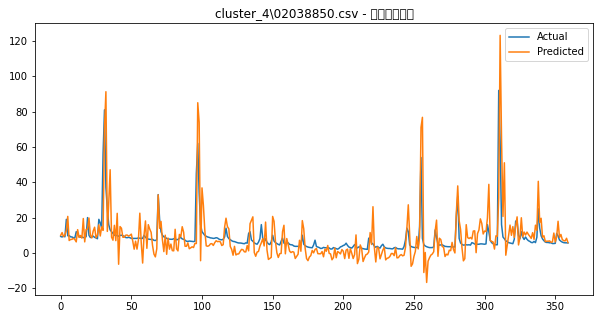

In [7]:

# 遍历每个流域的数据文件
for file in files:
    # 读取数据
    data = pd.read_csv(file)
    
    # 特征和目标
    features = ['Dayl', 'Prcp', 'Srad', 'Tmax',
                'Prcp_lag_1', 'Discharge_lag_1', 'Prcp_lag_2', 'Discharge_lag_2',
                'Discharge_lag_3', 'Discharge_lag_4']
    target = 'Discharge'
    
    # 分割训练集和测试集
    train_data = data.iloc[:1463]  # 前1463天的数据作为训练集
    test_data = data.iloc[1463:]  # 其余的数据作为测试集
    
    # 确保训练集和测试集不为空
    if train_data.empty or test_data.empty:
        print(f"Warning: {file} 的训练集或测试集为空，跳过该流域。")
        continue
    
    # 分离特征和目标
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]
    
    # 标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 转换为PyTorch张量
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
    
    # 训练模型
    num_epochs = 50
    batch_size = 32
    
    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size()[0])
        
        for i in range(0, X_train_tensor.size()[0], batch_size):
            indices = permutation[i:i+batch_size]
            batch_X, batch_y = X_train_tensor[indices], y_train_tensor[indices]
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
    
    # 评估模型
    model.eval()
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        y_pred = y_pred_tensor.numpy()
    
    # 计算MSE和R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{file} - Mean Squared Error: {mse}, R²: {r2}')
    
    # 保存结果
    results.append({'流域': file, 'MSE': mse, 'R²': r2})
    
    # 绘制预测结果与真实结果的对比
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'{file} - 流域预测对比')
    plt.legend()
    plt.savefig(f'{file}_prediction_comparison.png')  # 保存图片
    plt.show()
    
time2=time.time()


In [8]:
print(time2-time1,'s')
# 打印所有流域的结果
results_df = pd.DataFrame(results)
results_df.head()


47.44069790840149 s


,流域,MSE,R²
0,cluster_4\01516500.csv,948.325239,0.558452
1,cluster_4\01547700.csv,26673.101223,0.645481
2,cluster_4\01567500.csv,2553.244572,0.387880
3,cluster_4\01586610.csv,1533.103961,0.491715
4,cluster_4\01591400.csv,481.994961,0.658134


In [9]:
# 保存结果到本地CSV文件
results_df = pd.DataFrame(results)
results_df.to_csv(f'part-{clusteri}-results.csv', index=False, encoding='utf-8-sig')
print("结果已保存到results.csv文件中。")


结果已保存到results.csv文件中。


In [10]:
torch.save(model.state_dict(), f'part-{clusteri}-model_parameters.pth')

print("模型参数已保存到 'model_parameters.pth'")

模型参数已保存到 'model_parameters.pth'


In [11]:
# # 创建模型实例
# model = SimpleNN(input_dim)

# # 加载模型参数
# model.load_state_dict(torch.load('model_parameters.pth'))

# print("模型参数已加载")
